In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import rasterio
from rasterio.transform import from_origin
from rasterio.crs import CRS

In [7]:
list(dataset.variables)

['Times',
 'XLAT',
 'XLONG',
 'LU_INDEX',
 'ZNU',
 'ZNW',
 'ZS',
 'DZS',
 'VAR_SSO',
 'BATHYMETRY_FLAG',
 'U',
 'V',
 'W',
 'PH',
 'PHB',
 'T',
 'THM',
 'HFX_FORCE',
 'LH_FORCE',
 'TSK_FORCE',
 'HFX_FORCE_TEND',
 'LH_FORCE_TEND',
 'TSK_FORCE_TEND',
 'MU',
 'MUB',
 'NEST_POS',
 'P',
 'PB',
 'FNM',
 'FNP',
 'RDNW',
 'RDN',
 'DNW',
 'DN',
 'CFN',
 'CFN1',
 'THIS_IS_AN_IDEAL_RUN',
 'P_HYD',
 'Q2',
 'T2',
 'TH2',
 'PSFC',
 'U10',
 'V10',
 'RDX',
 'RDY',
 'AREA2D',
 'DX2D',
 'RESM',
 'ZETATOP',
 'CF1',
 'CF2',
 'CF3',
 'ITIMESTEP',
 'XTIME',
 'QVAPOR',
 'QCLOUD',
 'QRAIN',
 'QICE',
 'QSNOW',
 'QGRAUP',
 'QNCCN',
 'QNCLOUD',
 'QNRAIN',
 'SHDMAX',
 'SHDMIN',
 'SNOALB',
 'TSLB',
 'SMOIS',
 'SH2O',
 'SEAICE',
 'XICEM',
 'SFROFF',
 'UDROFF',
 'IVGTYP',
 'ISLTYP',
 'VEGFRA',
 'GRDFLX',
 'ACGRDFLX',
 'ACSNOM',
 'SNOW',
 'SNOWH',
 'CANWAT',
 'SSTSK',
 'WATER_DEPTH',
 'EP_PV_URB3D',
 'QGR_URB4D',
 'TGR_URB4D',
 'DRAINGR_URB3D',
 'COSZEN',
 'LAI',
 'U10E',
 'V10E',
 'DTAUX3D',
 'DTAUY3D',
 'DUSFCG',
 

In [19]:
dataset.variables['T2']

<class 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 91, 150)
filling on, default _FillValue of 9.969209968386869e+36 used

In [25]:
dataset.variables['T2'][:]

masked_array(
  data=[[[284.38776, 284.38525, 284.331  , ..., 289.60797, 289.30173,
          288.99774],
         [284.4814 , 284.454  , 284.3073 , ..., 289.68506, 289.34613,
          288.92236],
         [284.44632, 284.42078, 284.32172, ..., 289.72287, 289.29422,
          288.8008 ],
         ...,
         [282.04913, 282.17853, 282.2229 , ..., 282.89447, 283.23428,
          283.30872],
         [282.16122, 282.0679 , 282.13092, ..., 283.00272, 283.3131 ,
          283.38782],
         [281.96313, 282.14133, 282.00507, ..., 283.21338, 283.1336 ,
          283.30884]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

/tmp/ipykernel_27074/561376529.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(longitude, latitude, temperature[0], shading='auto')  # Change indices based on your needs


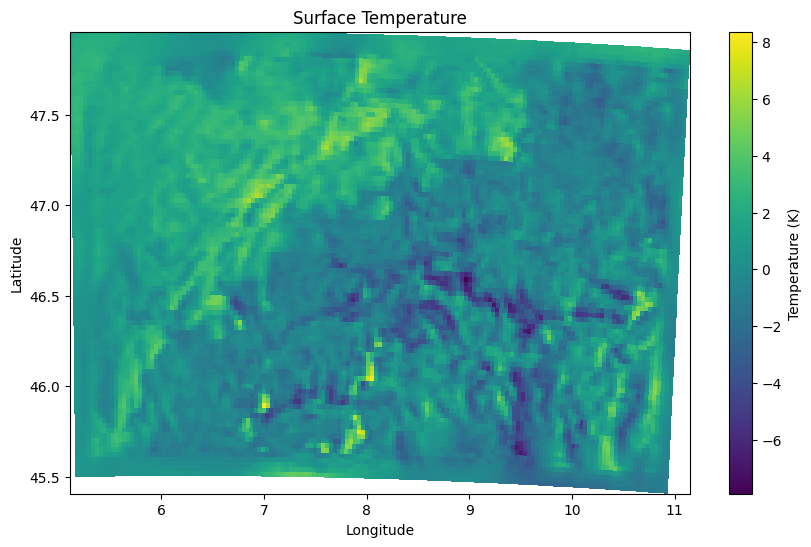

In [52]:

# Open the WRF file
dataset = nc.Dataset('data/wrfout_d01_2022-06-09_00:00:00')

# Read some variables
temperature = dataset.variables['U10'][:] # Example variable for surface temperature
longitude = dataset.variables['XLONG'][0]
latitude = dataset.variables['XLAT'][0]


# Plot the data
plt.figure(figsize=(10, 6))
plt.pcolormesh(longitude, latitude, temperature[0], shading='auto')  # Change indices based on your needs
plt.colorbar(label='Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Surface Temperature')
plt.show()



In [27]:
# Read some variables
temperature = dataset.variables['T2'][:]  # Surface temperature
longitude = dataset.variables['XLONG'][0]
latitude = dataset.variables['XLAT'][0]

# Select the first time step (if you have multiple)
temperature = temperature[0]

# Calculate the pixel size (assuming a regular grid)
lon_res = (longitude.max() - longitude.min()) / longitude.shape[1]
lat_res = (latitude.max() - latitude.min()) / latitude.shape[0]

# Define the transform for the GeoTIFF (top-left corner, pixel size)
transform = from_origin(longitude.min(), latitude.max(), lon_res, lat_res)

# Define the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'height': temperature.shape[0],
    'width': temperature.shape[1],
    'count': 1,
    'dtype': temperature.dtype,
    'crs': 'EPSG:4326',  # Assuming WGS84 coordinates
    'transform': transform
}

# Write the GeoTIFF
with rasterio.open('temperature.tif', 'w', **meta) as dst:
    dst.write(temperature, 1)

In [12]:
west_bound = longitude.min()
north_bound = latitude.max()
pixel_width = longitude[1] - longitude[0]  # Assuming regular spacing
pixel_height = latitude[0] - latitude[1]  # Assuming regular spacing; this is typically negative

In [13]:
print(type(west_bound), west_bound)
print(type(north_bound), north_bound)
print(type(pixel_width), pixel_width)
print(type(pixel_height), pixel_height)


<class 'numpy.float32'> 5.1321106
<class 'numpy.float32'> 47.945877
<class 'numpy.ma.core.MaskedArray'> [-5.1879883e-04 -4.8828125e-04 -4.8828125e-04 -4.5776367e-04
 -4.2724609e-04 -4.2724609e-04 -3.9672852e-04 -3.9672852e-04
 -3.6621094e-04 -3.6621094e-04 -3.3569336e-04 -3.3569336e-04
 -3.0517578e-04 -3.0517578e-04 -2.7465820e-04 -2.4414062e-04
 -2.1362305e-04 -2.1362305e-04 -1.8310547e-04 -1.8310547e-04
 -1.5258789e-04 -1.2207031e-04 -1.2207031e-04 -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05 -3.0517578e-05  0.0000000e+00
  0.0000000e+00  0.0000000e+00  3.0517578e-05  6.1035156e-05
  9.1552734e-05  9.1552734e-05  1.2207031e-04  1.2207031e-04
  1.5258789e-04  1.8310547e-04  1.8310547e-04  2.1362305e-04
  2.1362305e-04  2.4414062e-04  2.7465820e-04  3.0517578e-04
  3.0517578e-04  3.3569336e-04  3.3569336e-04  3.6621094e-04
  3.6621094e-04  3.9672852e-04  3.9672852e-04  4.2724609e-04
  4.5776367e-04  4.8828125e-04  5.1879883e-04  5.1879883e-04
  5.4931641e-04  5.4931641e-04  5.4931641e

In [14]:
transform = from_origin(west_bound, north_bound, pixel_width, pixel_height)


In [15]:

# If temperature is a masked array, convert it to a standard numpy array
if np.ma.is_masked(temperature):
    temperature = temperature.filled(np.nan)  # Fill masked values with NaN or an appropriate fill value

In [16]:
meta_crs= CRS.from_epsg(4326)  # EPSG:4326 is a common geographic coordinate system (WGS 84)


In [17]:

# Define metadata
meta = {
    'driver': 'GTiff',
    'dtype': 'float32',
    'nodata': None,
    'width': temperature.shape[1],
    'height': temperature.shape[0],
    'count': 1,
    'crs': meta_crs,  # or the appropriate CRS
    'transform': transform
}


In [46]:
import h5py
import numpy as np
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

# Open the WRF HDF file
with h5py.File('data/wrfout_d01_2022-06-10_12:00:00', 'r') as hdf_file:
    # Extract the temperature, latitude, and longitude
    temperature = hdf_file['T2'][:]
    longitude = hdf_file['XLONG'][0, :, :]
    latitude = hdf_file['XLAT'][0, :, :]
    
    # Optionally, extract projection information from the HDF attributes if available
    # proj_info = hdf_file.attrs.get('PROJ_INFO', None)
    # print(proj_info)

# Select the first time step (if you have multiple)
temperature = np.flipud(temperature[0])

# Calculate the pixel size (assuming a regular grid)
lon_res = (longitude.max() - longitude.min()) / longitude.shape[1]
lat_res = (latitude.max() - latitude.min()) / latitude.shape[0]

# Define the transform for the GeoTIFF (top-left corner, pixel size)
transform = from_origin(longitude.min(), latitude.max(), lon_res, lat_res)

# Define the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'height': temperature.shape[0],
    'width': temperature.shape[1],
    'count': 1,
    'dtype': temperature.dtype,
    'crs': CRS.from_epsg(4326),  # Replace with the correct EPSG code or projection string
    'transform': transform
}

# Write the GeoTIFF
with rasterio.open('temperature_corrected.tif', 'w', **meta) as dst:
    dst.write(temperature, 1)



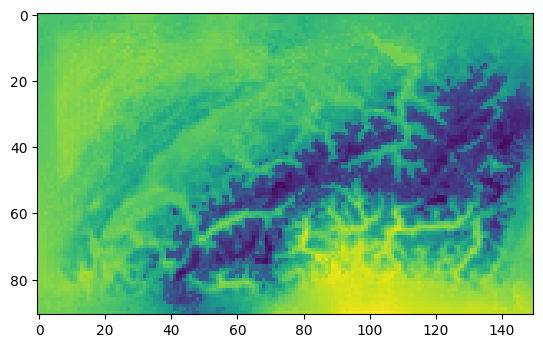

In [47]:
src = rasterio.open("temperature_corrected.tif")
plt.imshow(src.read(1), cmap='viridis')
plt.show()

/tmp/ipykernel_27074/4145795184.py:30: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cax = ax.pcolormesh(longitude, latitude, time_series[0], shading='auto', cmap='viridis')
/home/pierre/.pyenv/versions/utnc/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


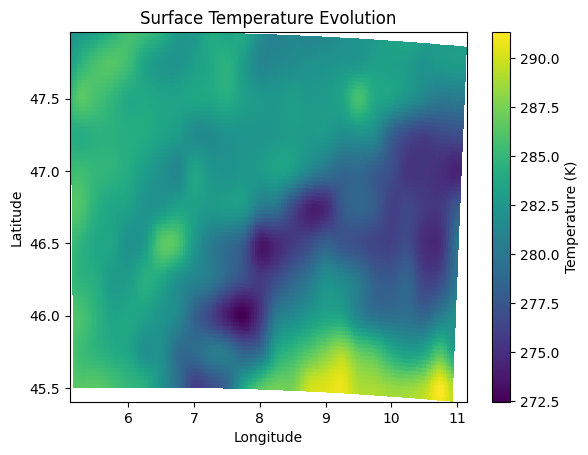

In [51]:
import h5py
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation

# Define the directory containing your WRF output files
data_dir = 'data'

# List of all WRF output files
wrf_files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('wrfout_d01')])

# Initialize lists to store data
time_series = []

# Loop through each file and extract temperature data
for file in wrf_files:
    with h5py.File(file, 'r') as hdf_file:
        temperature = hdf_file['T2'][0, :, :]  # Extract the first time step's temperature
        time_series.append(temperature)

# Get the coordinates for plotting (assuming they are the same across all files)
with h5py.File(wrf_files[0], 'r') as hdf_file:
    longitude = hdf_file['XLONG'][0, :, :]
    latitude = hdf_file['XLAT'][0, :, :]

# Set up the plot
fig, ax = plt.subplots()
cax = ax.pcolormesh(longitude, latitude, time_series[0], shading='auto', cmap='viridis')
fig.colorbar(cax, ax=ax, label='Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Surface Temperature Evolution')

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    cax = ax.pcolormesh(longitude, latitude, time_series[frame], shading='auto', cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Surface Temperature on {wrf_files[frame].split("_")[-2]}')

# Create the animation
anim = FuncAnimation(fig, update, frames=len(time_series), repeat=True)

# Show the animation
plt.show()

In [1]:
import h5py
import numpy as np

# Load the data from one of your files (all should have the same lat/lon grid)
with h5py.File('data/wrfout_d01_2022-06-01_00:00:00', 'r') as hdf_file:
    longitude = hdf_file['XLONG'][0, :, :]
    latitude = hdf_file['XLAT'][0, :, :]

# Find the bounds
min_lon = longitude.min()
max_lon = longitude.max()
min_lat = latitude.min()
max_lat = latitude.max()

# Print the bounds
print(f"Image Bounds:")
print(f"Top-left: ({min_lon}, {max_lat})")
print(f"Top-right: ({max_lon}, {max_lat})")
print(f"Bottom-right: ({max_lon}, {min_lat})")
print(f"Bottom-left: ({min_lon}, {min_lat})")

Image Bounds:
Top-left: (5.132110595703125, 47.94587707519531)
Top-right: (11.12701416015625, 47.94587707519531)
Bottom-right: (11.12701416015625, 45.420684814453125)
Bottom-left: (5.132110595703125, 45.420684814453125)
